# Movie Lens Dataset Visualisation and Analysis

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [`MovieLens`](http://movielens.org), a movie recommendation service. It contains __100836 ratings and 3683 tag applications across 9742 movies.__ These data were created by __610 users__ between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

## Contents
1. [Formulate questions for Analysis](#1.-Formulate-questions-for-Analysis)
2. [Import Necessary Libraries](#2.-Import-Necessary-Libraries)
3. [Read In and Explore/Analyse the Data](#3.-Read-in-and-Explore/Analyze-the-Data)
4. [Descriptive Analytics and Visualization](#4.-Descriptive-Analytics-and-Visualization)
5. [Final Summary and Results](#Final-Summary-and-Results)
6. [Model, Predict and Solve (If possible)](#6.-Model,-Predict-and-Solve)
7. [Model Evaluation (If possible)](#Results)

### 1. Formulate questions for Analysis
The main analysis will focus on answering the below questions. It's important to note that the findings in this analysis are based on a sample and are not definitive.

1. **Find the Year with most Movies released**
2. **What is the most common Genre ?**
3. **Find the Avg. Ratings given for each Movie by different Users**
4. **Movie with most No Users ratings.**
5. **Which User has Rated more no.of Movies and what is that Users Avg. Rating ?**
6. **Predict what would be the Rating a movie with specific Genres will get ?**

### 2. Import Necessary Libraries
First off, we need to import several __`Python libraries`__ such as __`numpy`__, __`pandas`__, __`matplotlib`__ and __`seaborn`__.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 3. Read in and Explore/Analyze the Data
It's time to read in our data's using **[`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)**, and take a first look at the dimensions and data using the **`shape()`** and **`head()`** functions.

In [2]:
#import train and test CSV files
movie = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
links = pd.read_csv("links.csv")
tags = pd.read_csv("tags.csv")
#take a look at the training data
print(movie.shape)
print(ratings.shape)
print(links.shape)
print(tags.shape,end="\n\n")
m=pd.read_csv("movies.csv")
movie.head(3)
links.head(3)
ratings.head(3)
tags.head(3)

#get a list of the features within the dataset
print("Movie : ", movie.columns,end="\n\n")
print("Rating : ", ratings.columns,end="\n\n")
print("Links : ", links.columns,end="\n\n")
print("Tags : ", tags.columns,end="\n\n")

movie.info()
ratings.info()
tags.info()

(9742, 3)
(100836, 4)
(9742, 3)
(3683, 4)

Movie :  Index(['movieId', 'title', 'genres'], dtype='object')

Rating :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Links :  Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Tags :  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3

* **Numerical Features:** movieId , userId , rating 
* **Categorical Features:** tags , genres 
* **Alphanumeric Features:** None

__`The data types for each feature`__
                                                                  
                                                                  
|*Name*|*Type*|
|--------------|--------------|
|**movieId**|int|
|**userId**|int|
|**title**|string|
|**genres**|string|
|**rating**|float|
|**tag**|string|

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

In [3]:
# Droping the timestamp column from ratings and tags file
ratings.drop(columns='timestamp',inplace=True)
tags.drop(columns='timestamp',inplace=True)

## Some Observations:

### There are a total of `9742` `Movie's` in our dataset with `100836` `Users Rating` the movie and `3683` `Tags`. 

* **userId**: Unique Id provided for each User
 * *userId* were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).


* **movieId**: Unique Id provided for each Movie
 * Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL __[Movie Lens](https://movielens.org/movies/1)__. Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).


* **rating** (`rating.csv`):  Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
 * All __Ratings__ are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user 
 * *Mean* show the average rating is **3.2-Star**


* **genres**:  Genres are a pipe-separated list, and are selected from the following:
 * *Action*
 * *Adventure*
 * *Animation*
 * *Children's*
 * *Comedy*
 * *Crime*
 * *Documentary*
 * *Drama*
 * *Fantasy*
 * *Film-Noir*
 * *Horror*
 * *Musical*
 * *Mystery*
 * *Romance*
 * *Sci-Fi*
 * *Thriller*
 * *War*
 * *Western*
 * *(no genres listed)*

#### Suggestions: 

*  _The __Timestamp__ column from both `tags.csv` and `ratings.csv` does not contribute much. So lets drop them_
* _`links.csv` has no usefull information hence lets drop the table._
* _In `movie.csv` from the **Title** column we can extrct the **year in which the movie was released.**_
* _For further prediction the **genres** column has to extracted and all Individual Genres has to br Encoded into Numerical Values ( eg. One-Hot-Encoding method )_

### 4. Descriptive Analytics and Visualization

In [4]:
#Extracting the year from the Title
movie['Year'] = movie['title'].str.extract('.*\((.*)\).*',expand = False)

Now that we have extracted the __`Year`__ from the __`Tilte`__ lets find out which Year has the highest number of Movie releases

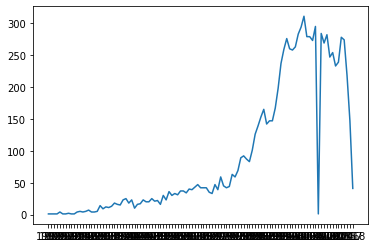

Max No.of Movies Relesed = 311
Year = 2002


count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [5]:
#Ploting a Graph with No.of Movies each Year corresponding to its Year
plt.plot(movie.groupby('Year').title.count())
plt.show()
a=movie.groupby('Year').title.count()
print('Max No.of Movies Relesed =',a.max())
for i in a.index:
    if a[i] == a.max():
        print('Year =',i)
a.describe()

###### 1.

As per the above result we got to know that in __`2002`__ has the highest number of movie releases with __`311 Movies`__.

On an `Avg.` there are around __`90 Movies`__ releasing per __Year__.

Now Lets extract the individual __`Genres`__ from the Genres column. And lets create columns with the each `Genres` as the name and allot __`" 1 "`__  if the movie has the Genre else __`" 0 "`__

In [6]:
# Seperate the Geners Column and Encoding them with One-Hot-Encoding Method.
genres=[]
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    movie[x] = 0
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        movie[x][i]=1
movie

,movieId,title,genres,Year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have the data in the Genres Column converted in to Numerical values in different columns, Lets Drop the Genres Column

In [7]:
movie.drop(columns='genres',inplace=True)
movie.sort_index(inplace=True)

Animation    				611
Children    				664
Comedy    				3756
Fantasy    				779
Romance    				1596
Drama    				4361
Action    				1828
Crime    				1199
Thriller    				1894
Horror    				978
Mystery    				573
Sci-Fi    				980
War    				382
Musical    				334
Documentary    				440
IMAX    				158
Western    				167
Film-Noir    				87
(no genres listed)    				34


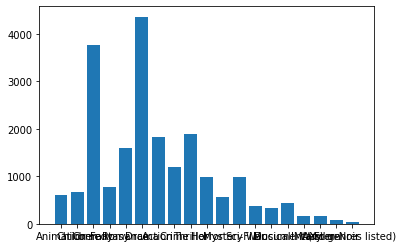

In [8]:
x={}
for i in movie.columns[4:23]:
    x[i]=movie[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))

plt.bar(height=x.values(),x=x.keys())
plt.show()

###### 2.

From the above we can say that __`Drama`__ is the most Comman Genre released in the Movie Field with __`4361` Movies__ followed by __Comedy__ with __`3756` Movies__ and so on ...........

##### 3.

As we can see that each movies is being rated by many Users, lets Group them by **`"movieId"`** and rate each movie with the mean of the Rating given by different Users.

In [9]:
#Add a Column `rating` in movie DF and assign them with the Mean Movie Rating for that Movie.
x=ratings.groupby('movieId').rating.mean()
movie = pd.merge(movie,x,how='outer',on='movieId')
movie['rating'].fillna('0',inplace=True)

In [10]:
# Now Lets group all the ratings with respect to movieId and count the no of Users
x = ratings.groupby('movieId',as_index=False).userId.count()
x.sort_values('userId',ascending=False,inplace=True)
y = pd.merge(movie,x,how='outer',on='movieId')

y.drop(columns=[i for i in movie.columns[2:23]],inplace=True)

y.sort_values(['userId','rating'],ascending=False)

,movieId,title,rating,userId
314,356,Forrest Gump (1994),4.16413,329.0
277,318,"Shawshank Redemption, The (1994)",4.42902,317.0
257,296,Pulp Fiction (1994),4.19707,307.0
510,593,"Silence of the Lambs, The (1991)",4.16129,279.0
1939,2571,"Matrix, The (1999)",4.19245,278.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),0,NaN
5824,32160,Twentieth Century (1934),0,NaN
5837,32371,Call Northside 777 (1948),0,NaN
5957,34482,"Browning Version, The (1951)",0,NaN


###### 4.

From the above table we can say that __`Forest Gump (1994)`__ has the ___Highest___ no.of. Ratings with __`4.16 Stars` by `329 Users`__ as average.

Followed by __`Shawshank Redemption, The (1994)`__ with __`317 User Ratings`__ and __`4.42 Stars`__ as average and so on.

In [11]:
#find the user with highest no.of. movie ratings and that users mean rating. 
x = ratings.groupby('userId',as_index=False).movieId.count()
y = ratings.groupby('userId',as_index=False).rating.mean()
x = pd.merge(x,y,how='outer',on='userId')

In [12]:
x.describe()

,userId,movieId,rating
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


In [13]:
x.sort_values('movieId',ascending=False)

,userId,movieId,rating
413,414,2698,3.391957
598,599,2478,2.642050
473,474,2108,3.398956
447,448,1864,2.847371
273,274,1346,3.235884
...,...,...,...
441,442,20,1.275000
568,569,20,4.000000
319,320,20,3.525000
575,576,20,3.100000


###### 5.

From above we found that __`userId`__ - __`414`__ has given the Highest no.of Ratings with __`2698`__ and an Average of __`3.39 Stars`__ followed by __`userId`__-__`599`__ with __`2478`__ Ratings and an Average of __`2.64 Stars`__ and so on ...

### Final Summary and Results

1. **Find the Year with most Movies Released**
 * The Year with most no.of Movies Released is __`2002`__ with __`311`__ Movie
 
 
 * __[`Click to see the Output`](#1.)__
 



2. **What is the most Common Genre ?**
 * The Most comman Genre is __`Drama`__ with __`4361 Movies`__ followed by __`Comedy`__ with __`3756 Movies`__
 
 
 * __[`Click to see the Output`](#2.)__
 



3. **Find the Avg. Ratings given for each movie by different users**
 * The Avg. Rating for each Movie is calculated and updated to the Movie DataFrame
 
 
 * __[`Click to see the Output`](#3.)__




4. **Movie with most No Users ratings.**
 *  The Movie with most no.of Users ratings is __`Forest Gump (1994)`__ with Highest no.of. Ratings with __`4.16 Stars`__ by __`329 Users`__ as Average followed by __`Shawshank Redemption, The (1994)`__ with __`317 User Ratings`__ and __`4.42 Stars`__ as Average.
 
 
 * __[`Click to see the Output`](#4.)__
 



5. **Which User has Rated More No. of Movies And what is that users Avg. Rating ?**
 * The User with Highest no.of Ratings and their Avg. Rating is __`userId`__ - __`414`__ with __`2698`__ no.of Ratings and a Average Rating of __`3.39 Stars`__ followed by __`userId`__-__`599`__ with __`2478`__ Ratings with Average Rating of __`2.64 Stars`__
 
 
 * __[`Click to see the Output`](#1.)__

In [14]:
for i in movie.columns[3:]:
    movie[i] = movie[i].astype(int)

### 6. Model, Predict and Solve

In [15]:
#importing necessary packages for model prediction and evaluation
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

We will use ___[`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)___ Model to `Predict` the Rating of a movie with it's Genres given.

In [16]:
#split the data into features and results
X = movie[movie.columns[3:23]]
y = movie[movie.columns[-1]]

As we know that the Genres are Enocded (with __[`One-Hot-Encoding`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)__ method) which is from the `3'rd` column to the `23rd` column are set as `features` and the `Ratings` (last column) is the expected `result`.

In [17]:
#spliting the data into Train Test and Validation sets
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.20 ,random_state = 1 ,shuffle = True)

Using __`sklearn.model_selection.train_test_split`__ function we will split the whole data into `train` data and `test` data

Here I am assigning __`20%`__ for `test` data and the rest __`80%`__ for `training` data

In [18]:
model = RandomForestRegressor(n_estimators=560,random_state=42)
model.fit(X_train,y_train)
print(mean_absolute_error(model.predict(X_train),y_train))

0.6273838864882512


For the __`Exact`__ same Data that we trained with,gives a error of __`0.62 stars`__

I have set the `n_estimators` to __`560`__ as it is results in `less error` than others after manually testing with multiple values.

Now let's try `predicting` the Ratings with the `Test data` and see the output and how well the model predicted.

In [19]:
preds = model.predict(X_test)
preds

array([4.13091037, 2.70301961, 3.02737812, ..., 3.27549095, 3.19069404,
       3.15317189])

In [20]:
print(mean_absolute_error(y_test,preds))

0.7005609442537233


From the above results we can say that the model perdicts the Ratings for a movie with __&#177; `0.70`__ deviated from the actual value.

### Results

As the analysis are based on a sample and are not definitive the model is quite reliable and for Predicting the `Rating` of a `Movie` with it's `Genres` given